### Opening Gap Strategy

In Chapter 4, we discussed a mean-reverting buy-on-gap strategy for stocks. The opposite momentum strategy will sometimes work on futures and currencies: buying when the instrument gaps up, and shorting when it gaps down.

After being tested on a number of futures, this strategy proved to work best on the Dow Jones STOXX 50 index futures (FSTX) trading on Eurex, which generates an annual percentage rate (APR) of 13 percent and a Sharpe ratio of 1.4 from July 16, 2004, to May 17, 2012. Example 7.1 shows the gap momentum code (available for download as [gapFutures_FSTX.py](https://github.com/usunyu/quant-for-fortune/blob/main/Algorithmic%20Trading%20-%20Winning%20Strategies%20and%20Their%20Rationale/gapFutures_FSTX.py)).

### Example 7.1: Opening Gap Strategy for FSTX

This code assumes the open, high, low, and close prices are contained in *T × 1* arrays *op, hi, lo, cl*.

In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt

<Axes: xlabel='July 16, 2004, to May 17, 2012', ylabel='Cumulative Returns'>

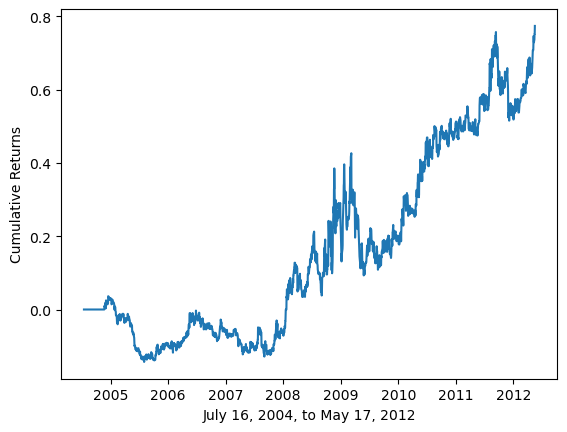

In [2]:
entryZscore=0.1;


df=pd.read_csv('inputDataDaily_FSTX_20120517.csv')
# remove HH:MM:SS
df['Date']=pd.to_datetime(df['Date'],  format='%Y%m%d').dt.date
df.set_index('Date', inplace=True)

stdretC2C90d=df['Close'].pct_change().rolling(90).std().shift()

longs= df['Open'] >= df['High'].shift()*(1+entryZscore*stdretC2C90d)
shorts=df['Open'] >= df['Low'].shift()*(1-entryZscore*stdretC2C90d)

positions=np.zeros(longs.shape)

positions[longs]=1
positions[shorts]=-1

ret=positions*(df['Close']-df['Open'])/df['Open']

cumret=(np.cumprod(1+ret)-1)
cumret.plot(
    xlabel='July 16, 2004, to May 17, 2012',
    ylabel='Cumulative Returns'
)

**FIGURE 7.1** Equity Curve of FSTX Opening Gap Strategy

In [3]:
print('APR=%f Sharpe=%f' % (np.prod(1+ret)**(252/len(ret))-1, np.sqrt(252)*np.mean(ret)/np.std(ret)))
from calculateMaxDD import calculateMaxDD
maxDD, maxDDD, i=calculateMaxDD(cumret.fillna(0))
print('Max DD=%f Max DDD in days=%i' % (maxDD, maxDDD))

APR=0.074864 Sharpe=0.494857
Max DD=-0.233629 Max DDD in days=789


The same strategy works on some currencies, too. However, the daily “open” and “close” need to be defined differently. If we define the close to be 5:00 p.m. ET, and the open to be 5:00 a.m. ET (corresponding to the London open), then applying this strategy to GBPUSD yields an APR of 7.2 percent and a Sharpe ratio of 1.3 from July 23, 2007, to February 20, 2012. Naturally, you can experiment with different definitions of opening and closing times for different currencies. Most currency markets are closed from 5:00 p.m. on Friday to 5:00 p.m. on Sunday, so that’s a natural “gap” for these strategies.

What’s special about the overnight or weekend gap that sometimes triggers momentum? The extended period without any trading means that the opening price is often quite different from the closing price. Hence, stop orders set at different prices may get triggered all at once at the open. The execution of these stop orders often leads to momentum because a cascading effect may trigger stop orders placed further away from the open price as well. Alternatively, there may be significant events that occurred overnight. As discussed in the next section, many types of news events generate momentum.